In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Movie_Dataset=pd.read_csv('Movie-Rating.csv')

In [3]:
Movie_Dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
Movie_Dataset.shape

(15509, 10)

In [5]:
Movie_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [6]:
Movie_Dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
Movie_Dataset=Movie_Dataset.drop(columns=['Name','Actor 2', 'Actor 3'])
Movie_Dataset.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor


In [8]:
Movie_Dataset.dropna(inplace=True)

In [9]:
Movie_Dataset.drop_duplicates(inplace=True)
Movie_Dataset.shape

(5746, 7)

In [10]:
Movie_Dataset['Year'].unique()

array([-2019., -1997., -2005., -2012., -2014., -2004., -2016., -1991.,
       -2018., -2010., -1958., -2021., -2017., -2009., -1993., -2002.,
       -2008., -1994., -2007., -2003., -1998., -1979., -1974., -2015.,
       -2006., -1981., -2020., -1985., -2013., -2011., -1988., -1987.,
       -1996., -1999., -1973., -1968., -1982., -1977., -1950., -1969.,
       -1948., -1990., -1989., -2001., -2000., -1953., -1978., -1963.,
       -1992., -1976., -1984., -1986., -1966., -1975., -1980., -1967.,
       -1970., -1952., -1972., -1971., -1964., -1954., -1962., -1957.,
       -1965., -1995., -1956., -1955., -1936., -1983., -1951., -1961.,
       -1959., -1949., -1960., -1946., -1940., -1945., -1938., -1941.,
       -1942., -1935., -1937., -1947., -1931., -1933., -1943., -1944.,
       -1932., -1939., -1934.])

In [11]:
def handleYear(value):
    value=str(value).strip('()')
    try:
        return int(float(value))
    except ValueError:
        return None
Movie_Dataset['Year'] = Movie_Dataset['Year'].apply(handleYear)
Movie_Dataset['Year'].head()

1   -2019
3   -2019
5   -1997
6   -2005
8   -2012
Name: Year, dtype: int64

In [12]:
Movie_Dataset['Duration'].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '52 min', '89 min', '112 min',
       '143 min', '177 min', '117 min', '123 min', '72 min', '154 min',
       '175 min', '153 min', '78 min', '139 min', '133 min', '180 min',
       '46 min', '164 min', '162 min', '171 min', '160 min', '152 min',
       '163 min', '165 min', '141 min', '129 min', '156 min', '240 

In [13]:
def handleDuration(value):
    value=str(value).split(' ')
    value=value[0]
    return int(value)
Movie_Dataset['Duration']=Movie_Dataset['Duration'].apply(handleDuration)
Movie_Dataset['Duration'].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [14]:
Movie_Dataset['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [15]:
def split_genre_column(Movie_Dataset,Genre):
    Movie_Dataset['Genre1'] = Movie_Dataset[Genre].str.split(',', expand=True)[0]
    Movie_Dataset['Genre2'] = Movie_Dataset[Genre].str.split(',', expand=True)[1]
    Movie_Dataset['Genre3'] = Movie_Dataset[Genre].str.split(',', expand=True)[2]
    return Movie_Dataset
split_genre_column(Movie_Dataset,'Genre')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,-2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,-2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,-1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,-2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,-2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...
15493,-2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,-2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,-1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,-1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [16]:
Movie_Dataset.isna().sum()

Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Genre1         0
Genre2      1717
Genre3      3412
dtype: int64

In [17]:
Movie_Dataset=Movie_Dataset.fillna(0)
Movie_Dataset.isna().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Genre1      0
Genre2      0
Genre3      0
dtype: int64

In [18]:
Movie_Dataset=Movie_Dataset.drop(columns=['Genre'])
Movie_Dataset.head(3)

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,-2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,0,0
3,-2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,0
5,-1997,147,4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical


In [19]:
Movie_Dataset['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [20]:
def handleVotes(value):
    value=str(value).replace(',','')
    return int(value)
Movie_Dataset['Votes'] = Movie_Dataset['Votes'].apply(handleVotes)
Movie_Dataset['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

In [21]:
Movie_Dataset['MovieAge'] = 2024 - Movie_Dataset['Year']
Movie_Dataset['MovieAge']

1        4043
3        4043
5        4021
6        4029
8        4036
         ... 
15493    4039
15494    4025
15503    4013
15505    4023
15508    4022
Name: MovieAge, Length: 5746, dtype: int64

In [22]:
DirectorCounts = Movie_Dataset['Director'].value_counts()
Movie_Dataset['DirectorPopularity'] = Movie_Dataset['Director'].map(DirectorCounts)
ActorCounts = Movie_Dataset['Actor 1'].value_counts()
Movie_Dataset['ActotPopularity'] = Movie_Dataset['Actor 1'].map(ActorCounts)

In [23]:
Movie_Dataset['LogVotes']=np.log10(Movie_Dataset['Votes'])
Movie_Dataset['LogVotes']

1        0.903090
3        1.544068
5        2.917506
6        3.035830
8        2.513218
           ...   
15493    2.610660
15494    3.174932
15503    1.643453
15505    2.816241
15508    1.301030
Name: LogVotes, Length: 5746, dtype: float64

Historcal Rating Average

In [25]:
DirectorAvgRating=Movie_Dataset.groupby('Director')['Rating'].mean()
Movie_Dataset['DirectorAvgRating'] = Movie_Dataset['Director'].map(DirectorAvgRating)
ActorAvgRating = Movie_Dataset[['Actor 1']].stack().reset_index(name = 'Actor')
ActorAvgRating = ActorAvgRating.merge(Movie_Dataset[['Rating']], left_on='level_0', right_index=True)
ActorAvgRating = ActorAvgRating.groupby('Actor')['Rating'].mean()
Movie_Dataset['ActorAvgRating'] = Movie_Dataset['Actor 1'].map(ActorAvgRating)


Director Influence on Ratings

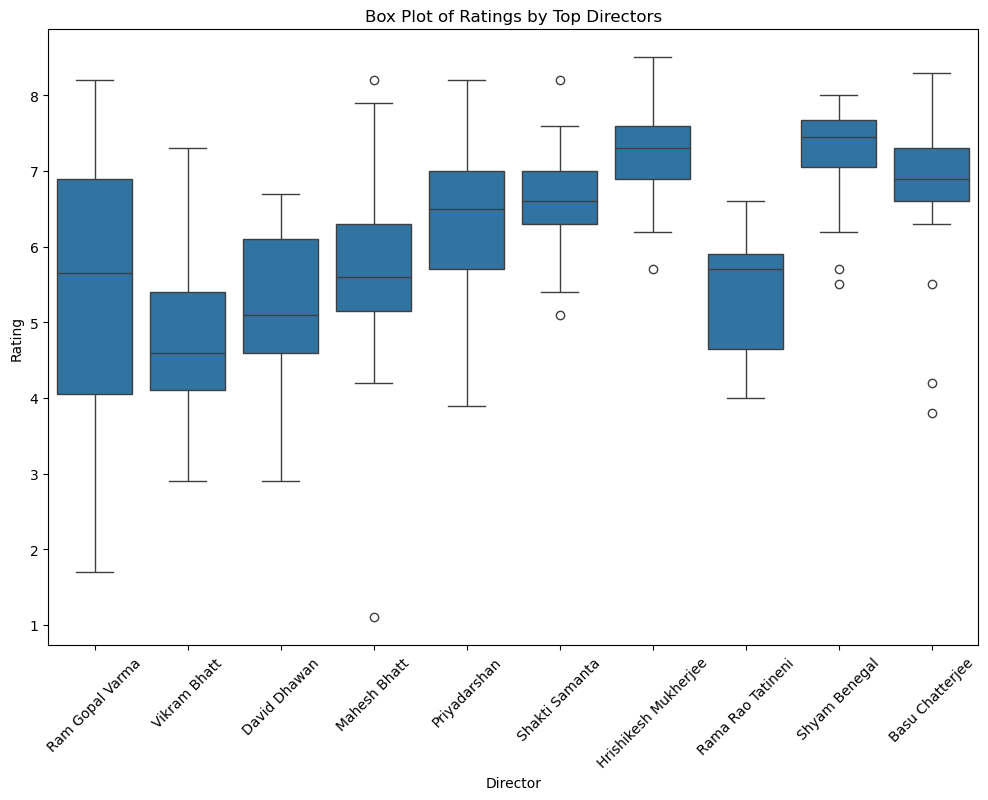

In [27]:
plt.figure(figsize=(12, 8))
TopDirector = Movie_Dataset['Director'].value_counts().index[0:10]
sns.boxplot(data=Movie_Dataset[Movie_Dataset['Director'].isin(TopDirector)], x='Director', y='Rating')
plt.title('Box Plot of Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)  
plt.show()


Actor Influence on Ratings

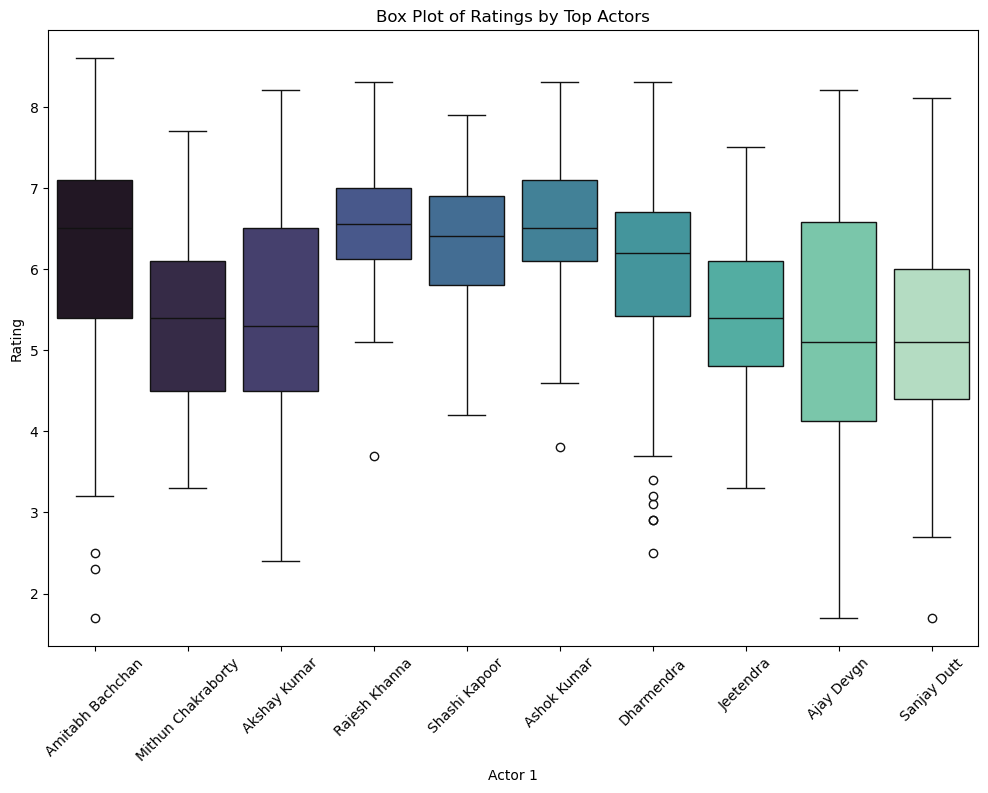

In [29]:
plt.figure(figsize=(12, 8))
TopActors = Movie_Dataset['Actor 1'].value_counts().index[:10]
sns.boxplot(data=Movie_Dataset[Movie_Dataset['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', hue='Actor 1', palette='mako',legend=False)

plt.title('Box Plot of Ratings by Top Actors')
plt.xlabel('Actor 1')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x1200 with 0 Axes>

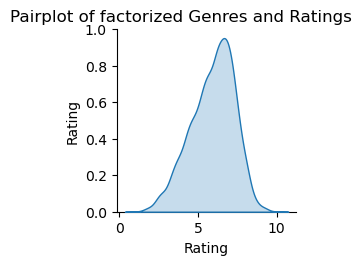

In [30]:
GenreColumns=['Genre1','Genre2','Genre3','Rating']
plt.figure(figsize=(15,12))
sns.pairplot(Movie_Dataset[GenreColumns], diag_kind='kde',kind='scatter')
plt.suptitle('Pairplot of factorized Genres and Ratings', y=1.02)
plt.show()

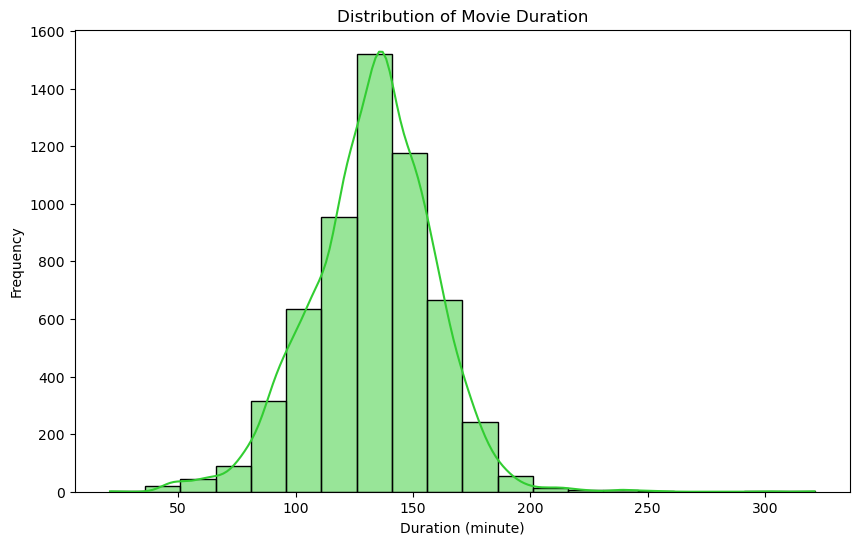

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(Movie_Dataset['Duration'],bins=20,kde=True,color='limegreen')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minute)')
plt.ylabel('Frequency')
plt.show()

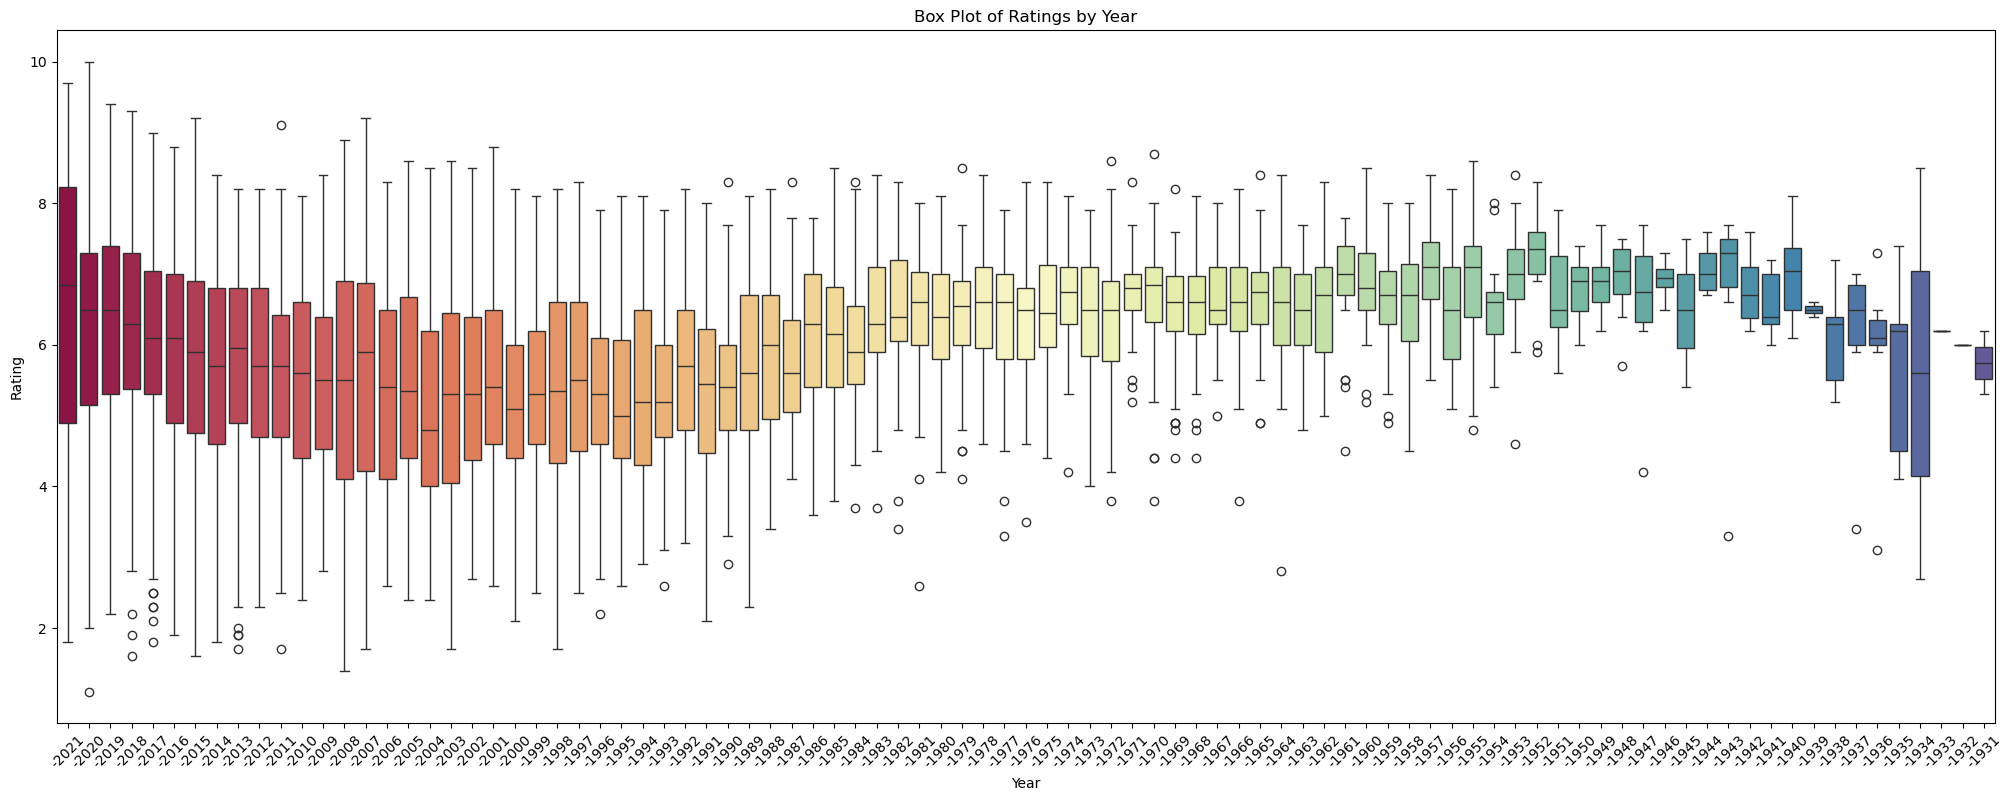

In [34]:
plt.figure(figsize=(25,9))
sns.boxplot(data=Movie_Dataset,x='Year',y='Rating',hue='Year', palette='Spectral', legend=False)
sns.dark_palette("#69d",reverse=True,as_cmap=True)
plt.title('Box Plot of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

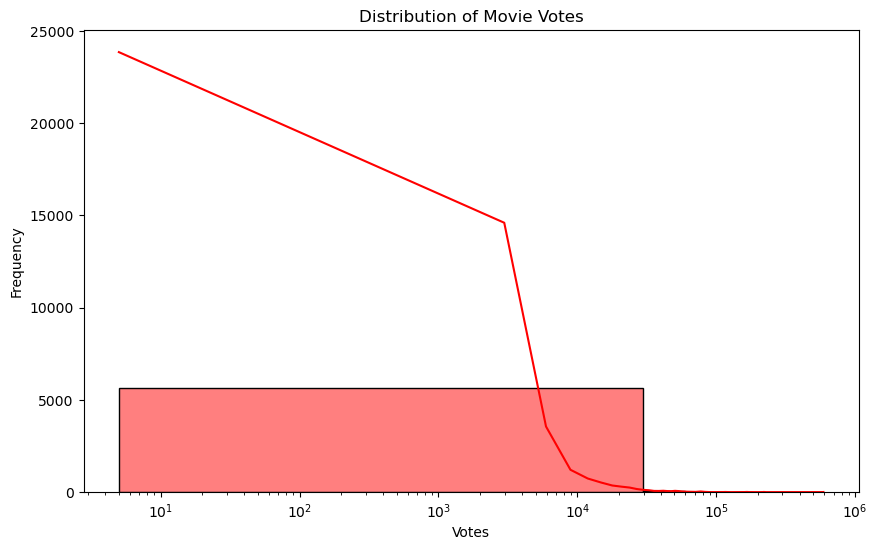

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(Movie_Dataset['Votes'],bins=20,kde=True,color='red')
plt.title('Distribution of Movie Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

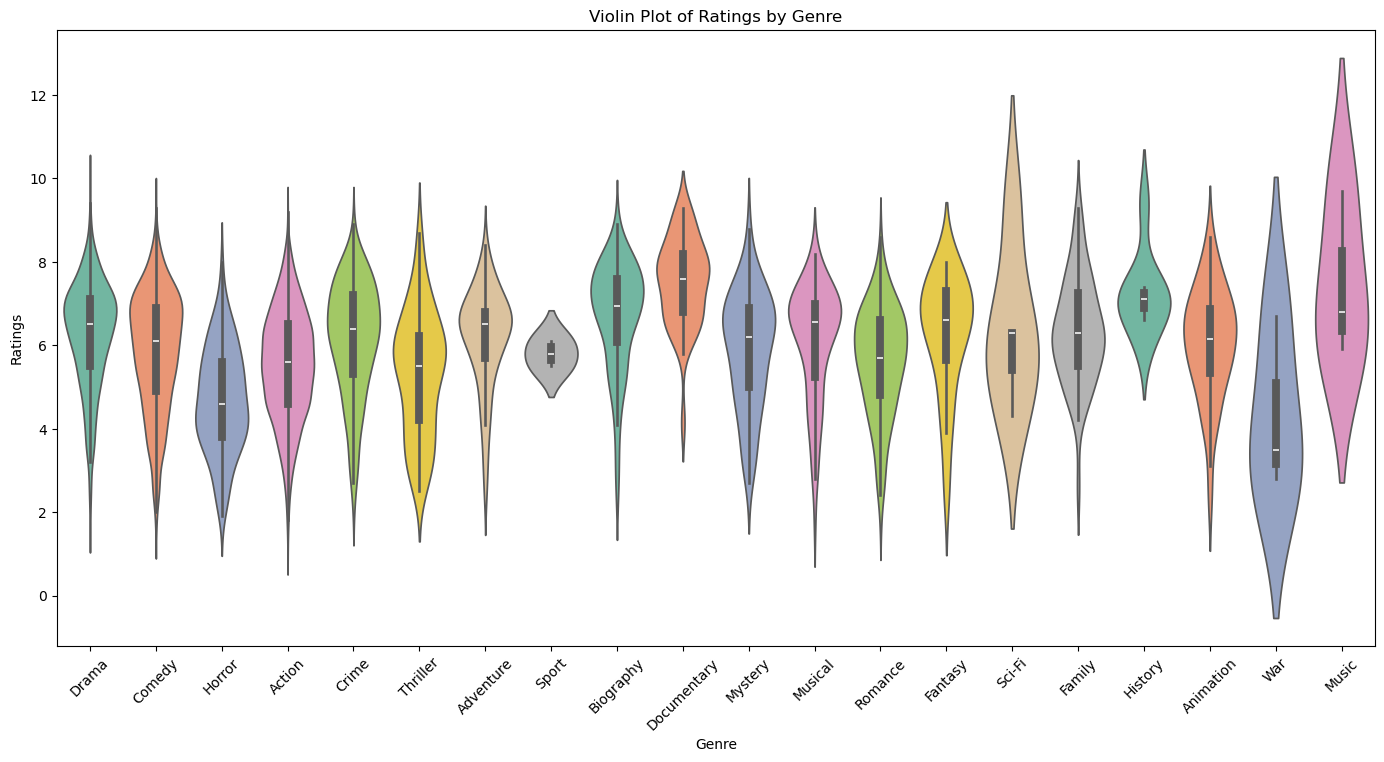

In [46]:
plt.figure(figsize=(17,8))
sns.violinplot(data=Movie_Dataset,x='Genre1',y='Rating', hue='Genre1', palette='Set2')
plt.title('Violin Plot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

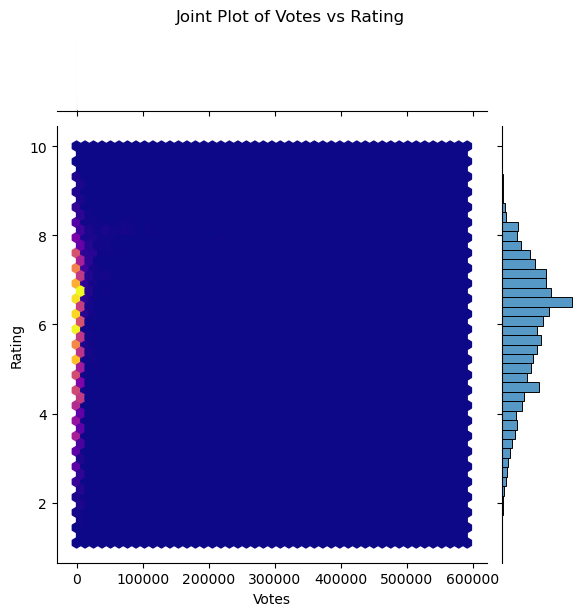

In [51]:
sns.jointplot(data=Movie_Dataset,x='Votes',y='Rating', kind='hex',cmap='plasma')
plt.suptitle('Joint Plot of Votes vs Rating',y=1.02)
plt.show()

In [55]:
Movie_Dataset['Genre1 encoded'] =round(Movie_Dataset.groupby('Genre1')['Rating'].transform('mean'),1)
Movie_Dataset['Genre2 encoded']=round(Movie_Dataset.groupby('Genre2')['Rating'].transform('mean'),1)
Movie_Dataset['Genre3 encoded'] =round(Movie_Dataset.groupby('Genre3')['Rating'].transform('mean'),1)
Movie_Dataset['Votes encoded'] =round(Movie_Dataset.groupby('Votes')['Rating'].transform('mean'), 1)
Movie_Dataset['Director encoded']= round(Movie_Dataset.groupby('Director')['Rating'].transform('mean'), 1)
Movie_Dataset['Actor 1 encoded']= round(Movie_Dataset.groupby('Actor 1')['Rating'].transform('mean'), 1)
Movie_Dataset.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,MovieAge,...,ActotPopularity,LogVotes,DirectorAvgRating,ActorAvgRating,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,-2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,0,0,4043,...,2,0.903090,7.000000,6.850000,6.3,6.0,6.0,5.6,7.0,6.8
3,-2019,110,4.4,35,Ovais Khan,Prateik,Comedy,Romance,0,4043,...,5,1.544068,4.400000,5.420000,5.8,5.9,6.0,5.7,4.4,5.4
5,-1997,147,4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical,4021,...,18,2.917506,5.313333,4.788889,5.8,5.9,6.0,4.8,5.3,4.8
6,-2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War,4029,...,20,3.035830,7.383333,5.435000,6.3,5.9,6.3,7.4,7.4,5.4
8,-2012,82,5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller,4036,...,1,2.513218,5.600000,5.600000,4.7,5.7,5.7,6.6,5.6,5.6


In [61]:
Movie_Dataset.drop(columns=['Genre1','Votes','Director','Actor 1','Genre2','Genre3'],inplace=True)
Movie_Dataset['Rating'] =round(Movie_Dataset['Rating'],1)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


In [63]:
X=Movie_Dataset.drop('Rating',axis=1)
Y=Movie_Dataset['Rating']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=52)

model=LinearRegression()
model.fit(X_train,Y_train)

X_test_prediction= model.predict(X_test)

mse =mean_squared_error(Y_test,X_test_prediction)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(Y_test,X_test_prediction)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error (MSE): 0.40
R-squared score: 0.79


In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_RF=RandomForestRegressor(n_estimators=100,random_state=50)
model_RF.fit(X_train,Y_train)
X_test_prediction_RF=model_RF.predict(X_test)

mse_RF =mean_squared_error(Y_test,X_test_prediction_RF)
print(f"Mean Squared Error (MSE): {mse_RF:.2f}")

r2_RF = r2_score(Y_test,X_test_prediction_RF)
print(f"R-squared score: {r2_RF:.2f}")

Mean Squared Error (MSE): 0.29
R-squared score: 0.85


In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_GB = GradientBoostingRegressor(n_estimators=100,random_state=50)
model_GB.fit(X_train,Y_train)
X_test_prediction_GB=model_GB.predict(X_test)

mse_GB =mean_squared_error(Y_test,X_test_prediction_GB)
print(f"Mean Squared Error (MSE): {mse_GB:.2f}")

r2_GB= r2_score(Y_test,X_test_prediction_GB)
print(f"R-squared score: {r2_GB:.2f}")

Mean Squared Error (MSE): 0.29
R-squared score: 0.83


In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_SVR = SVR(kernel='linear',C=1.0,epsilon=0.1,gamma='scale')
model_SVR.fit(X_train,Y_train)
X_test_prediction_SVR=model_SVR.predict(X_test)

mse_SVR =mean_squared_error(Y_test,X_test_prediction_SVR)
print(f"Mean Squared Error (MSE): {mse_SVR:.2f}")

r2_SVR= r2_score(Y_test,X_test_prediction_SVR)
print(f"R-squared score: {r2_SVR:.2f}")

Mean Squared Error (MSE): 11.37
R-squared score: -4.62


In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_SVR = SVR(kernel='linear',C=1.0,epsilon=0.1,gamma='scale')
model_SVR.fit(X_train,Y_train)
X_test_prediction_SVR=model_SVR.predict(X_test)

mse_SVR =mean_squared_error(Y_test,X_test_prediction_SVR)
print(f"Mean Squared Error (MSE): {mse_SVR:.2f}")

r2_SVR= r2_score(Y_test,X_test_prediction_SVR)
print(f"R-squared score: {r2_SVR:.2f}")

Mean Squared Error (MSE): 16.46
R-squared score: -7.62


In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_DT=DecisionTreeRegressor(random_state=42)
model_DT.fit(X_train,Y_train)
X_test_prediction_DT=model_DT.predict(X_test)

mse_DT =mean_squared_error(Y_test,X_test_prediction_DT)
print(f"Mean Squared Error (MSE): {mse_DT:.2f}")

r2_DT = r2_score(Y_test,X_test_prediction_DT)
print(f"R-squared score: {r2_DT:.2f}")

Mean Squared Error (MSE): 0.60
R-squared score: 0.65


In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_NN = MLPRegressor(hidden_layer_sizes=(100,),random_state=42)
model_NN.fit(X_train,Y_train)
X_test_prediction_NN=model_NN.predict(X_test)

mse_NN =mean_squared_error(Y_test,X_test_prediction_NN)
print(f"Mean Squared Error (MSE):{mse_NN:.2f}")

r2_NN= r2_score(Y_test,X_test_prediction_NN)
print(f"R-squared score:{r2_NN:.2f}")

Mean Squared Error (MSE):3.09
R-squared score:-0.69


In [72]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting', 
              'Support Vector Machine','Neural Network'],
    'Mean Squared Error (MSE)': [mse*100,mse_DT*100,mse_RF*100, mse_GB*100,mse_SVR*100,mse_NN*100],
    'R-squared score (R2)': [r2*100, r2_DT*100,r2_RF*100,r2_GB*100,r2_SVR*100,r2_NN*100]
})
print(results)

                    Model  Mean Squared Error (MSE)  R-squared score (R2)
0       Linear Regression                 39.613161             79.435915
1           Decision Tree                 60.422609             64.973889
2           Random Forest                 28.871938             85.008441
3       Gradient Boosting                 29.153605             82.877228
4  Support Vector Machine               1645.931483           -761.548441
5          Neural Network                309.086307            -68.841926


In [73]:
models = results['Model']
mse_scores = results['Mean Squared Error (MSE)'].round(2)
r2_scores = results['R-squared score (R2)'].round(2)
num_models = len(models)
bar_width = 0.35
index = np.arange(num_models)

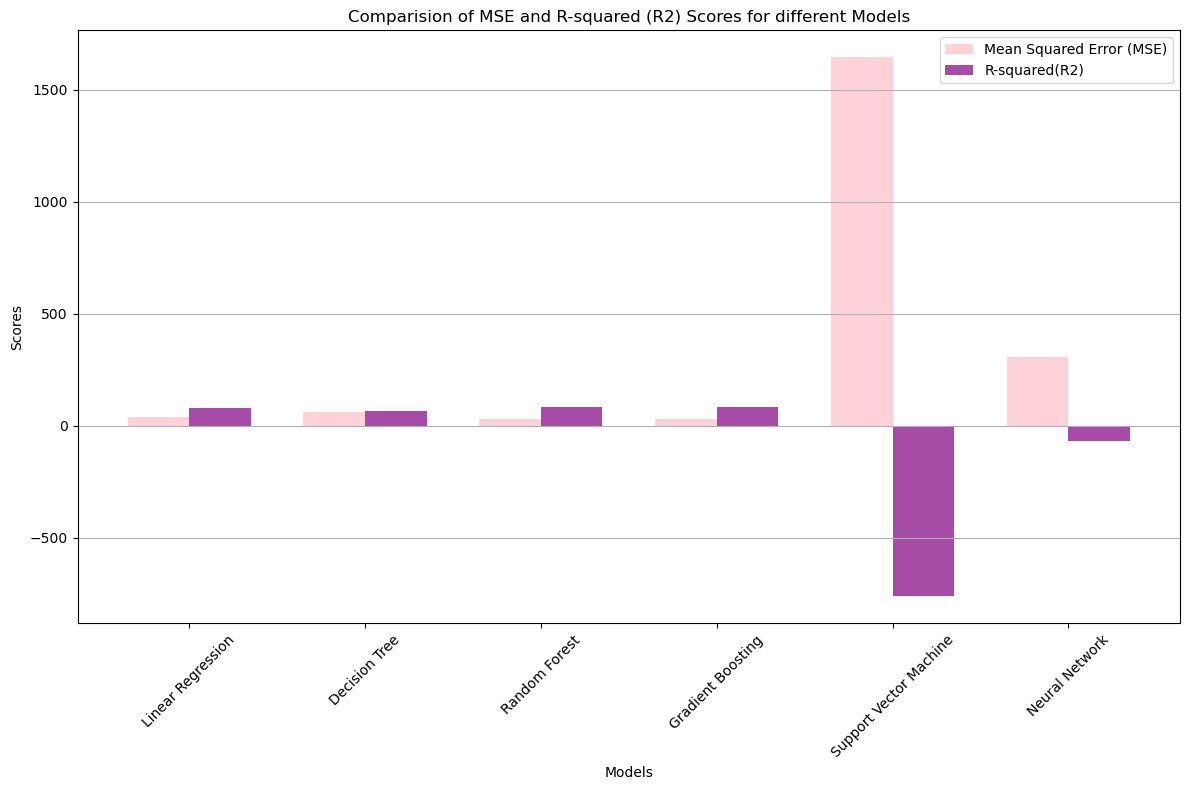

In [74]:
plt.figure(figsize=(12,8))
plt.bar(index,mse_scores,bar_width,label='Mean Squared Error (MSE)',color='grey',alpha=0.7)
plt.bar(index+bar_width,r2_scores,bar_width,label='R-squared(R2)',color='purple',alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparision of MSE and R-squared (R2) Scores for different Models')
plt.xticks(index+bar_width/2,models,rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()